In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import mixture

In [3]:
def plot(weight, mean, std_dev):
    start = min(mean) - 3 * max(std_dev)
    end = max(mean) + 3 * max(std_dev)
    x = np.linspace(start, end, 500)

    y0 = stats.norm.pdf(x, mean[0], std_dev[0])
    y1 = stats.norm.pdf(x, mean[1], std_dev[1])
    y2 = stats.norm.pdf(x, mean[2], std_dev[2])
    y = y0 * weight[0] + y1 * weight[1] + y2 * weight[2]

    plt.plot(x, y0, x, y1, x, y2)
    plt.plot(x, y)
    plt.show()


def generate_data(weight, mean, std_dev):
    data = []
    for _ in range(2000):
        num = np.random.choice([0, 1, 2], p=weight)
        data.append(stats.norm(loc=mean[num], scale=std_dev[num]).rvs())
    return np.array(data)


def get_likelihood(data, mean, std_dev, weight):
    likelihood = 0
    for i in range(3):
        likelihood += sum(stats.norm.pdf(data, mean[i], std_dev[i]) * weight[i])
    return likelihood


def Expectation(data, mean, std_dev, weight):
    n1 = np.array(stats.norm.pdf(data, mean[0], std_dev[0])) * weight[0]
    n2 = np.array(stats.norm.pdf(data, mean[1], std_dev[1])) * weight[1]
    n3 = np.array(stats.norm.pdf(data, mean[2], std_dev[2])) * weight[2]
    n = np.array([n1, n2, n3])
    n = n.transpose()
    for i in range(len(n)):
        n[i] = n[i] / sum(n[i])
    return n


def Maximisation(data, posteriori):
    sum_prob = posteriori.sum(axis=0)
    mean = data.dot(posteriori) / sum_prob
    std_dev = []
    for i in range(3):
        temp = (data - mean[i]) ** 2
        var = temp.dot(posteriori[:, i]) / sum_prob[i]
        std_dev.append(var ** 0.5)
    weight = sum_prob / len(data)
    return mean, std_dev, weight


def em(data, weight, mean, std_dev):
    previous_likelihood = get_likelihood(data, mean, std_dev, weight)
    while True:
        posteriori = Expectation(data, mean, std_dev, weight)
        mean, std_dev, weight = Maximisation(data, posteriori)
        likelihood = get_likelihood(data, mean, std_dev, weight)
        if likelihood - previous_likelihood < 0.000000001:
            break
        else:
            previous_likelihood = likelihood
    return weight, mean, std_dev
 

def sklearn_gmm(data):
    gmm = mixture.GaussianMixture(n_components=3, max_iter=5000, tol=0.0000001)
    out = gmm.fit(data.reshape(-1, 1))
    weight = out.weights_
    mean = out.means_[:, 0]
    std_dev = out.covariances_[:,0][:, 0] ** 0.5
    return weight, mean, std_dev

In [30]:
actual_weight = [0.33, 0.33, 0.34]
actual_mean = [-0.9, 3, 5.75]
actual_std_dev = [1, 1, 1]

data = generate_data(actual_weight, actual_mean, actual_std_dev)

random_weight = np.array([0.4, 0.2, 0.4])
random_mean = np.array([2, 4, 7])
random_std_dev = np.array([1.5, 1.6, 1])

cal_weight, cal_mean, cal_std_dev = em(data, random_weight, random_mean, random_std_dev)
out_weight, out_mean, out_std_dev = sklearn_gmm(data)


Actual


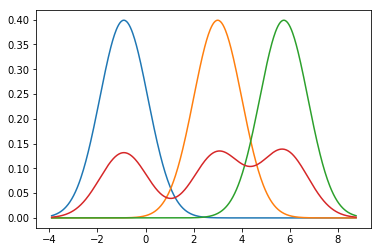

Calculated


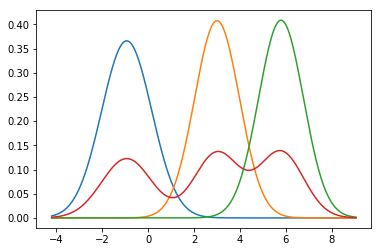

Using sklearn


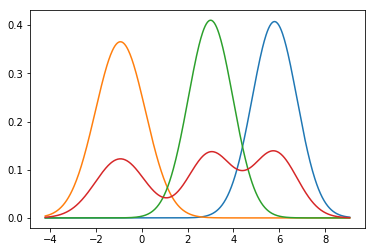

In [31]:
print('Actual')
plot(actual_weight, actual_mean, actual_std_dev)
print('Calculated')
plot(cal_weight, cal_mean, cal_std_dev)
print('Using sklearn')
plot(out_weight, out_mean, out_std_dev)